In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
df = pd.read_csv('C:/Users/smolanko/Google Drive/Data_Science/MyCodes/MyDatasets/Titanic/Database_Titanic.csv', sep=';')

df['Age'] = df['Age'].str.replace(',', '.').astype('float')

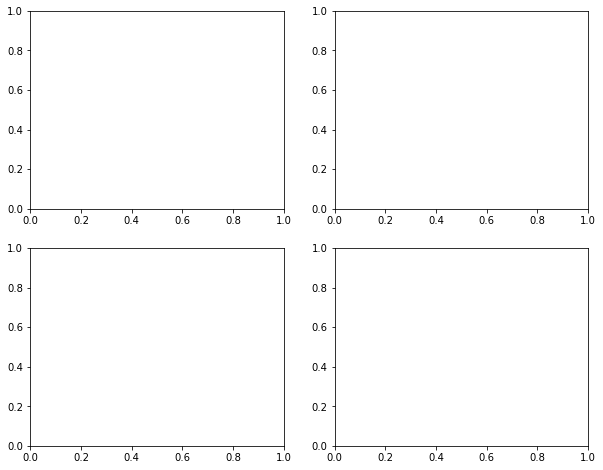

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10, 8))

,Age
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000
...,...
1304,14.5000
1305,NaN
1306,26.5000
1307,27.0000


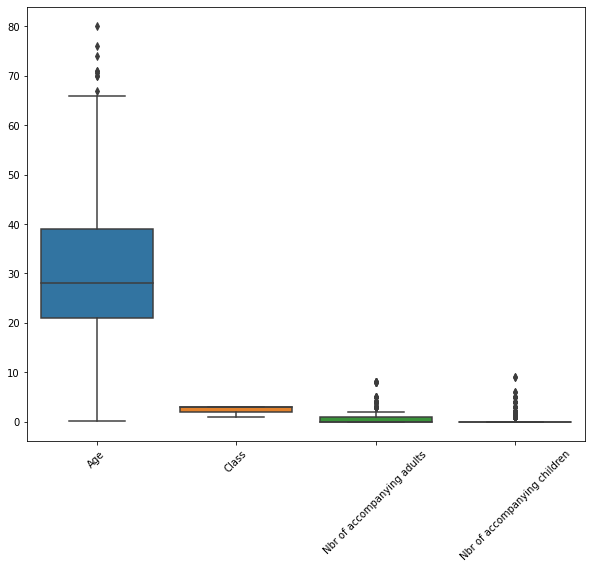

In [128]:
select_num = df.loc[:, ((df.dtypes == 'float64') | (df.dtypes == 'int64')) & (df.columns != 'ID') & (df.columns != 'Body')]

fig, ax = plt.subplots(figsize = (10, 8))

bp = sns.boxplot(data = select_num)

bp.set_xticklabels(bp.get_xticklabels(), rotation=45)

plt.show()

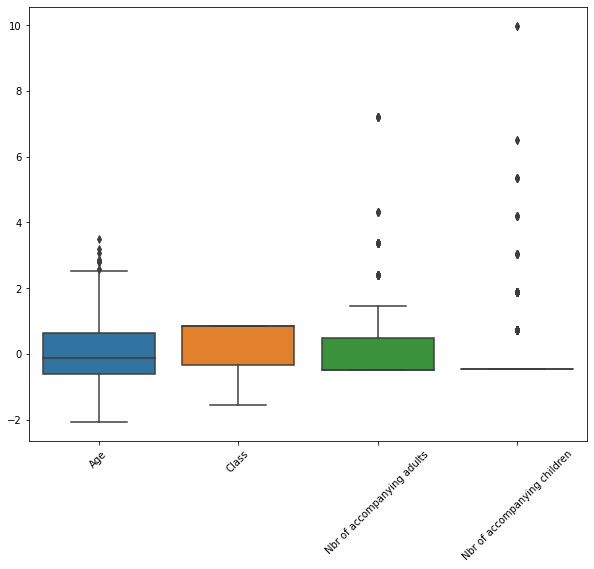

In [129]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

scaled_data = pd.DataFrame(std_scaler.fit_transform(select_num), columns=select_num.columns)

fig, ax = plt.subplots(figsize = (10, 8))

bp = sns.boxplot(data = scaled_data)

bp.set_xticklabels(bp.get_xticklabels(), rotation=45)

plt.show()

In [130]:
scaled_data.describe()

,Age,Class,Nbr of accompanying adults,Nbr of accompanying children
count,1.046000e+03,1.309000e+03,1.309000e+03,1.309000e+03
mean,-1.358590e-16,-1.737003e-16,-8.142201e-18,1.628440e-17
std,1.000478e+00,1.000382e+00,1.000382e+00,1.000382e+00
min,-2.062556e+00,-1.546098e+00,-4.790868e-01,-4.449995e-01
25%,-6.164626e-01,-3.520907e-01,-4.790868e-01,-4.449995e-01
50%,-1.305744e-01,8.419164e-01,-4.790868e-01,-4.449995e-01
75%,6.329641e-01,8.419164e-01,4.812878e-01,-4.449995e-01
max,3.478880e+00,8.419164e-01,7.203909e+00,9.956864e+00


In [131]:
q25 = scaled_data.quantile(0.25)
q75 = scaled_data.quantile(0.75)

print(q25)
print('-'*35)
print(q75)
print('-'*35)
IQR = q75-q25
print(IQR)

Age                            -0.616463
Class                          -0.352091
Nbr of accompanying adults     -0.479087
Nbr of accompanying children   -0.445000
Name: 0.25, dtype: float64
-----------------------------------
Age                             0.632964
Class                           0.841916
Nbr of accompanying adults      0.481288
Nbr of accompanying children   -0.445000
Name: 0.75, dtype: float64
-----------------------------------
Age                             1.249427
Class                           1.194007
Nbr of accompanying adults      0.960375
Nbr of accompanying children    0.000000
dtype: float64


In [132]:
(scaled_data < q25 - 1.5*IQR).any(axis=0) # NO OTLIERS DOWN!

Age                             False
Class                           False
Nbr of accompanying adults      False
Nbr of accompanying children    False
dtype: bool

In [133]:
(scaled_data > q75 + 1.5*IQR).any(axis=0) # THERE ARE OUTLIERS UP!

Age                              True
Class                           False
Nbr of accompanying adults       True
Nbr of accompanying children     True
dtype: bool

In [134]:
# How many outliers are there
((scaled_data < q25 - 1.5*IQR) | (scaled_data > q75 + 1.5*IQR)).sum()

Age                               9
Class                             0
Nbr of accompanying adults       57
Nbr of accompanying children    307
dtype: int64

In [135]:
# Check if outlier
((scaled_data < q25 - 1.5*IQR) | (scaled_data > q75 + 1.5*IQR))

,Age,Class,Nbr of accompanying adults,Nbr of accompanying children
0,False,False,False,False
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
1304,False,False,False,False
1305,False,False,False,False
1306,False,False,False,False
1307,False,False,False,False


In [136]:
# Check if outlier in a row accross all comumns
((scaled_data < q25 - 1.5*IQR) | (scaled_data > q75 + 1.5*IQR)).any(axis=1)

0       False
1        True
2        True
3        True
4        True
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

In [137]:
# Deselect all outliers
~((scaled_data < q25 - 1.5*IQR) | (scaled_data > q75 + 1.5*IQR)).any(axis=1)

0        True
1       False
2       False
3       False
4       False
        ...  
1304     True
1305     True
1306     True
1307     True
1308     True
Length: 1309, dtype: bool

In [138]:
scaled_data_wo_out = scaled_data[~((scaled_data < q25 - 1.5*IQR) | (scaled_data > q75 + 1.5*IQR)).any(axis=1)]

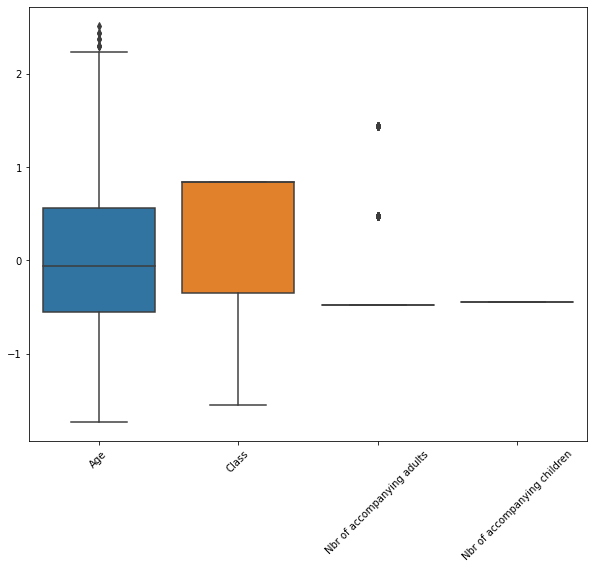

In [139]:
fig, ax = plt.subplots(figsize = (10, 8))

bp = sns.boxplot(data = scaled_data_wo_out)

bp.set_xticklabels(bp.get_xticklabels(), rotation=45)

plt.show()